<a href="https://colab.research.google.com/github/jytheodora/Gurobi_Study/blob/main/04_3D_Tic_Tac_Toc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install gurobipy

     |████████████████████████████████| 11.5 MB 7.5 MB/s 


In [ ]:
import gurobipy as gp
from gurobipy import GRB

선 자체를 정해줌 -> 정답 설정

In [ ]:
lines = []
size = 3

for i in range(size):
    for j in range(size):
        for k in range(size):
            if i == 0:
                lines.append(((0,j,k), (1,j,k), (2,j,k)))
            if j == 0:
                lines.append(((i,0,k), (i,1,k), (i,2,k)))
            if k == 0:
                lines.append(((i,j,0), (i,j,1), (i,j,2)))
            if i == 0 and j == 0:
                lines.append(((0,0,k), (1,1,k), (2,2,k)))
            if i == 0 and j == 2:
                lines.append(((0,2,k), (1,1,k), (2,0,k)))
            if i == 0 and k == 0:
                lines.append(((0,j,0), (1,j,1), (2,j,2)))
            if i == 0 and k == 2:
                lines.append(((0,j,2), (1,j,1), (2,j,0)))
            if j == 0 and k == 0:
                lines.append(((i,0,0), (i,1,1), (i,2,2)))
            if j == 0 and k == 2:
                lines.append(((i,0,2), (i,1,1), (i,2,0)))
lines.append(((0,0,0), (1,1,1), (2,2,2))) #대각선
lines.append(((2,0,0), (1,1,1), (0,2,2))) #대각선
lines.append(((0,2,0), (1,1,1), (2,0,2))) #대각선
lines.append(((0,0,2), (1,1,1), (2,2,0))) #대각선
print(lines)
print(len(lines))

[((0, 0, 0), (1, 0, 0), (2, 0, 0)), ((0, 0, 0), (0, 1, 0), (0, 2, 0)), ((0, 0, 0), (0, 0, 1), (0, 0, 2)), ((0, 0, 0), (1, 1, 0), (2, 2, 0)), ((0, 0, 0), (1, 0, 1), (2, 0, 2)), ((0, 0, 0), (0, 1, 1), (0, 2, 2)), ((0, 0, 1), (1, 0, 1), (2, 0, 1)), ((0, 0, 1), (0, 1, 1), (0, 2, 1)), ((0, 0, 1), (1, 1, 1), (2, 2, 1)), ((0, 0, 2), (1, 0, 2), (2, 0, 2)), ((0, 0, 2), (0, 1, 2), (0, 2, 2)), ((0, 0, 2), (1, 1, 2), (2, 2, 2)), ((0, 0, 2), (1, 0, 1), (2, 0, 0)), ((0, 0, 2), (0, 1, 1), (0, 2, 0)), ((0, 1, 0), (1, 1, 0), (2, 1, 0)), ((0, 1, 0), (0, 1, 1), (0, 1, 2)), ((0, 1, 0), (1, 1, 1), (2, 1, 2)), ((0, 1, 1), (1, 1, 1), (2, 1, 1)), ((0, 1, 2), (1, 1, 2), (2, 1, 2)), ((0, 1, 2), (1, 1, 1), (2, 1, 0)), ((0, 2, 0), (1, 2, 0), (2, 2, 0)), ((0, 2, 0), (0, 2, 1), (0, 2, 2)), ((0, 2, 0), (1, 1, 0), (2, 0, 0)), ((0, 2, 0), (1, 2, 1), (2, 2, 2)), ((0, 2, 1), (1, 2, 1), (2, 2, 1)), ((0, 2, 1), (1, 1, 1), (2, 0, 1)), ((0, 2, 2), (1, 2, 2), (2, 2, 2)), ((0, 2, 2), (1, 1, 2), (2, 0, 2)), ((0, 2, 2), (1, 2, 

In [ ]:
for i in range(size):
    for j in range(size):
        for k in range(size):
            if i == 0:
                lines.append(((0,j,k), (1,j,k), (2,j,k)))
print(lines)
print(len(lines))

[((0, 0, 0), (1, 0, 0), (2, 0, 0)), ((0, 0, 0), (0, 1, 0), (0, 2, 0)), ((0, 0, 0), (0, 0, 1), (0, 0, 2)), ((0, 0, 0), (1, 1, 0), (2, 2, 0)), ((0, 0, 0), (1, 0, 1), (2, 0, 2)), ((0, 0, 0), (0, 1, 1), (0, 2, 2)), ((0, 0, 1), (1, 0, 1), (2, 0, 1)), ((0, 0, 1), (0, 1, 1), (0, 2, 1)), ((0, 0, 1), (1, 1, 1), (2, 2, 1)), ((0, 0, 2), (1, 0, 2), (2, 0, 2)), ((0, 0, 2), (0, 1, 2), (0, 2, 2)), ((0, 0, 2), (1, 1, 2), (2, 2, 2)), ((0, 0, 2), (1, 0, 1), (2, 0, 0)), ((0, 0, 2), (0, 1, 1), (0, 2, 0)), ((0, 1, 0), (1, 1, 0), (2, 1, 0)), ((0, 1, 0), (0, 1, 1), (0, 1, 2)), ((0, 1, 0), (1, 1, 1), (2, 1, 2)), ((0, 1, 1), (1, 1, 1), (2, 1, 1)), ((0, 1, 2), (1, 1, 2), (2, 1, 2)), ((0, 1, 2), (1, 1, 1), (2, 1, 0)), ((0, 2, 0), (1, 2, 0), (2, 2, 0)), ((0, 2, 0), (0, 2, 1), (0, 2, 2)), ((0, 2, 0), (1, 1, 0), (2, 0, 0)), ((0, 2, 0), (1, 2, 1), (2, 2, 2)), ((0, 2, 1), (1, 2, 1), (2, 2, 1)), ((0, 2, 1), (1, 1, 1), (2, 0, 1)), ((0, 2, 2), (1, 2, 2), (2, 2, 2)), ((0, 2, 2), (1, 1, 2), (2, 0, 2)), ((0, 2, 2), (1, 2, 

In [ ]:
#1열로 정해진 리스트를 N개의 묶음으로 나눠서 자르기

def list_chunk(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

#list_lines = list_chunk(lines, 3)
#print(list_lines)

1. 구로비 모델을 만든다 - 모델명 'Tic_Tac_Toe'
2. isX (바둑알[검정색/흰색, 좌표X/O]) 데이터 타입 설정, BINARY (1/0 = T/F = 선택/비선택)
3. isLine (선이 맞냐 아니냐) 데이터 타입 설정, BINARY (1/0 = T/F = 선택/비선택)

In [ ]:
model = gp.Model('Tic_Tac_Toe')
isX = model.addVars(size, size, size, vtype=GRB.BINARY, name="isX")
isLine = model.addVars(lines, vtype=GRB.BINARY, name="isLine")

4. isX = 14 -> 3차원 칸이므모 9칸*3(높이) = 27 (총 27칸이 있음)

tic-tac-toc 게임에서는 X(검정색)이 먼저 선택한다는 가정하에,
X는 총 14개, O는 총 13개 된다.

그래서 isX의 총합이 14가 되어야 함

In [ ]:
x14 = model.addConstr(isX.sum() == 14)

---
## Model Formulation


### Decision Variables

$\text{isX}_{ijk} \in [0,1]$: Does cell $(i,j,k)$ contain an $X$ ($isX=1$) or an $O$ ($isX=0$)?

$\text{isLine}_{l} \in [0,1]$: Does line/diagonal $l$ contain 3 of the same symbol?

### Objective Function

- **Lines**: Minimize the number of completed lines or diagonals

\begin{equation}
\text{Minimize} \quad Z = \sum_{l \in \text{Lines}}\text{isLine}_l
\end{equation}

### Constraints

- **Take turns**: The board must contain 14 $X$'s and 13 $O$'s ($X$ goes first).

\begin{equation}
\sum_{ijk} \text{isX}_{ijk} = 14
\end{equation}

- **Lines**: For a line to not be complete, one cell must have a different value.  The simple observation here is that the sum of the corresponding 3 binary variables would be 3 if they are all $X$ and 0 if they were all $O$.   We need to forbid those outcomes whenever $isLine_l == 0$.  Note that $l_0$ is the first cell in line $l$, $l_1$ is the second, and $l_2$ is the third.

\begin{equation}
\text{isLine}_l == 0 \implies isX[l_0] + isX[l_1] + isX[l_2] >= 1 \quad \forall l \in \text{Lines}
\end{equation}

\begin{equation}
\text{isLine}_l == 0 \implies isX[l_0] + isX[l_1] + isX[l_2] <= 2 \quad \forall l \in \text{Lines}
\end{equation}

---
## Python Implementation

We import the Gurobi Python Module.

5. 라인을 이루는 전제조건


문제에서는 만들어질 수 있는 선의 수를 최소화 하므로 >> isLine = 0 이여야 하며

이 때 선을 이루는 ixX의 총 합이 0아니면 3이 되면 안됨

    isX = 1 (검정색이 다 선택되었을 때), 3 = 검정색으로 ●●●

    isX = 0 (검정색이 다 선택X = 흰색으로 다 선택되었다는 의미), 0 = 흰색으로 ○○○

1보다 같거나 크거나 함

2보다 같거나 작아야 함

if 조건에 대한 Gurobi 명령어 : model.**addGenConstrIndicator**

In [ ]:
for line in lines:
    model.addGenConstrIndicator(isLine[line], False, isX[line[0]] + isX[line[1]] + isX[line[2]] >= 1)
    model.addGenConstrIndicator(isLine[line], False, isX[line[0]] + isX[line[1]] + isX[line[2]] <= 2)

In [ ]:
model.setObjective(isLine.sum())

In [ ]:
model.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 1 rows, 76 columns and 27 nonzeros
Model fingerprint: 0x9039be95
Model has 98 general constraints
Variable types: 0 continuous, 76 integer (76 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 1e+01]
  GenCon rhs range [1e+00, 2e+00]
  GenCon coe range [1e+00, 1e+00]
Presolved: 99 rows, 76 columns, 419 nonzeros

Continuing optimization...


Cutting planes:
  MIR: 2
  Inf proof: 12
  Zero half: 3

Explored 1040 nodes (8066 simplex iterations) in 0.08 seconds (0.00 work units)
Thread count was 2 (of 2 available processors)

Solution count 3: 4 6 7 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.000000000000e+00, best bound 4.000000000000e+00, gap 0.0000%


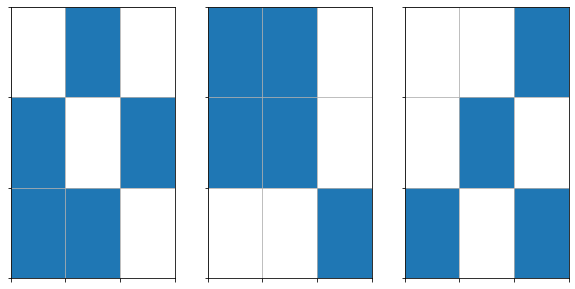

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 3, figsize=(10,5))
for i in range(3):
    ax[i].grid()
    ax[i].set_xticks(range(4))
    ax[i].set_yticks(range(4))
    ax[i].tick_params(labelleft=False, labelbottom=False)
    
for cell in isX.keys():
    if isX[cell].x > 0.5:
        ax[cell[0]].add_patch(plt.Rectangle((cell[1],cell[2]), 1, 1))

plt.show()